In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [3]:
fotos=fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [4]:
fotos

{'data': array([[ 57.      ,  60.333332,  78.      , ...,  17.333334,  16.666666,
          22.666666],
        [ 66.666664,  80.666664,  88.666664, ...,   8.666667,   8.333333,
           9.333333],
        [ 18.666666,  14.333333,  15.      , ...,  22.666666,  22.666666,
          25.666666],
        ...,
        [ 77.333336,  90.333336,  93.333336, ..., 233.66667 , 234.33333 ,
         230.66667 ],
        [ 87.666664,  71.666664,  63.333332, ...,  96.      ,  92.333336,
          96.333336],
        [ 91.      ,  90.666664,  94.666664, ...,  40.333332,  42.333332,
          42.333332]], dtype=float32),
 'images': array([[[ 57.       ,  60.333332 ,  78.       , ...,  40.666668 ,
           36.666668 ,  34.       ],
         [ 52.666668 ,  60.       ,  92.       , ...,  46.666668 ,
           36.       ,  30.       ],
         [ 46.       ,  66.       , 113.333336 , ...,  51.       ,
           43.333332 ,  37.666668 ],
         ...,
         [ 61.       ,  62.666668 ,  62.333332 , .

In [5]:
imagen_formato=fotos.images[0].shape

In [6]:
imagen_formato

(87, 65)

In [8]:
## TENSOR
fotos.images.shape

(3023, 87, 65)

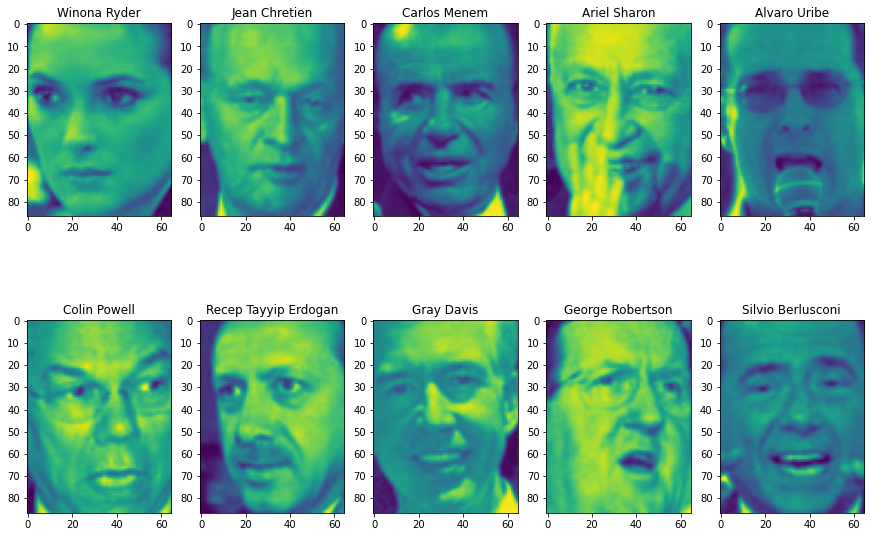

In [11]:
fig, axes = plt.subplots(2,5,figsize=(15,10))
for target, imagen, ax in zip(fotos.target,fotos.images,axes.ravel()):
    ax.imshow(imagen)
    ax.set_title(fotos.target_names[target])

In [13]:
fotos.target.shape

(3023,)

In [16]:
pd.DataFrame(fotos.target).value_counts()

14    530
10    236
58    144
12    121
15    109
     ... 
4      20
30     20
46     20
22     20
43     20
Length: 62, dtype: int64

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(fotos.data,fotos.target,stratify=fotos.target,random_state=1234)

In [18]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
knn.score(X_test,y_test)

0.3082010582010582

In [20]:
#### Vamos a utilizar PCA
from sklearn.decomposition import PCA

In [21]:
X_train.shape

(2267, 5655)

In [ ]:
### Vamos a probar con 100 200 500

In [22]:
pca_100=PCA(n_components=100).fit(X_train)
pca_200=PCA(n_components=200).fit(X_train)
pca_500=PCA(n_components=500).fit(X_train)
########
X_train_100=pca_100.transform(X_train)
X_test_100=pca_100.transform(X_test)
X_train_200=pca_200.transform(X_train)
X_test_200=pca_200.transform(X_test)
X_train_500=pca_500.transform(X_train)
X_test_500=pca_500.transform(X_test)

In [23]:
kkn_100=KNeighborsClassifier(n_neighbors=5)
kkn_200=KNeighborsClassifier(n_neighbors=5)
kkn_500=KNeighborsClassifier(n_neighbors=5)

In [24]:
kkn_100.fit(X_train_100,y_train)
kkn_200.fit(X_train_200,y_train)
kkn_500.fit(X_train_500,y_train)

KNeighborsClassifier()

In [25]:
kkn_100.score(X_train_100,y_train)
kkn_200.score(X_train_200,y_train)
kkn_500.score(X_train_500,y_train)

0.5363917071018968

In [27]:
print(kkn_100.score(X_test_100,y_test))
print(kkn_200.score(X_test_200,y_test))
print(kkn_500.score(X_test_500,y_test))

0.294973544973545
0.3029100529100529
0.30952380952380953


In [29]:
pca_Total=PCA(n_components=2267).fit(X_train)

In [30]:
pca_Total.explained_variance_ratio_

array([2.1352643e-01, 1.1955742e-01, 6.9302954e-02, ..., 6.7374444e-08,
       5.9792470e-08, 2.8579411e-12], dtype=float32)

In [31]:
sum(pca_Total.explained_variance_ratio_[0:500])*100

98.77988217085658

In [32]:
sum(pca_Total.explained_variance_ratio_[0:200])*100

95.08763079356868

In [33]:
sum(pca_Total.explained_variance_ratio_[0:100])*100

89.92465271730907

Text(0, 0.5, 'ACumulado de varianza explicada')

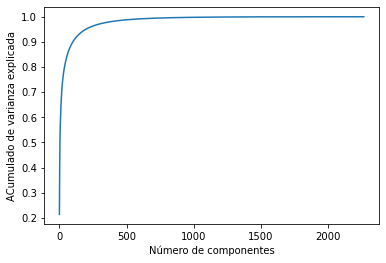

In [34]:
plt.plot(np.cumsum(pca_Total.explained_variance_ratio_))
plt.xlabel("Número de componentes")
plt.ylabel("ACumulado de varianza explicada")

In [35]:
from urllib import request

![](https://live.staticflickr.com/1573/26146921423_29f9a86f2b_c.jpg)

In [36]:
url="https://live.staticflickr.com/1573/26146921423_29f9a86f2b_c.jpg"
Martin=request.urlopen(url).read()

In [38]:
Martin_Foto=open("Practica_PCA.jpg","wb")
Martin_Foto.write(Martin)
Martin_Foto.close()

In [39]:
Martin_LK=plt.imread("Practica_PCA.jpg")
Martin_LK.shape

(531, 800, 3)

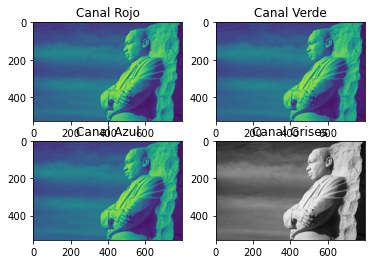

In [40]:
plt.subplot(2,2,1)
plt.title("Canal Rojo")
plt.imshow(Martin_LK[:,:,0])
plt.subplot(222)
plt.title("Canal Verde")
plt.imshow(Martin_LK[:,:,1])
plt.subplot(223)
plt.title("Canal Azul")
plt.imshow(Martin_LK[:,:,2])
plt.subplot(224)
plt.title("Canal Grises")
plt.imshow(Martin_LK[:,:,0],cmap=plt.cm.Greys_r)

In [41]:
Martin_G=Martin_LK[:,:,0]

![](https://www.interactivechaos.com/sites/default/files/data/sunset.png)

In [43]:
img=plt.imread("https://www.interactivechaos.com/sites/default/files/data/sunset.png")

C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_9460\921511185.py:1: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  img=plt.imread("https://www.interactivechaos.com/sites/default/files/data/sunset.png")


In [44]:
img.shape

(600, 800, 4)

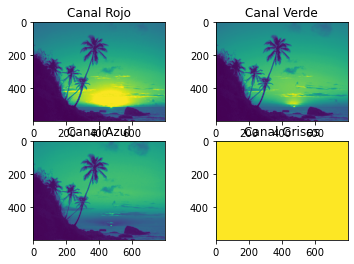

In [45]:
plt.subplot(2,2,1)
plt.title("Canal Rojo")
plt.imshow(img[:,:,0])
plt.subplot(222)
plt.title("Canal Verde")
plt.imshow(img[:,:,1])
plt.subplot(223)
plt.title("Canal Azul")
plt.imshow(img[:,:,2])
plt.subplot(224)
plt.title("Canal Grises")
plt.imshow(img[:,:,3])

In [47]:
### Retoamamos con Martin

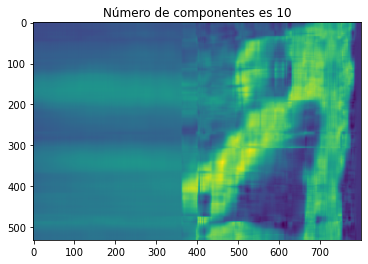

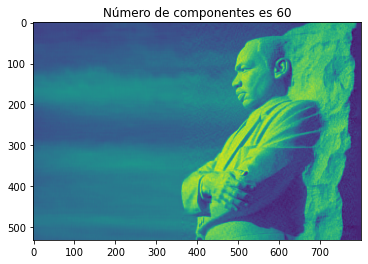

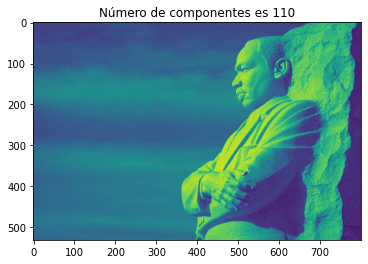

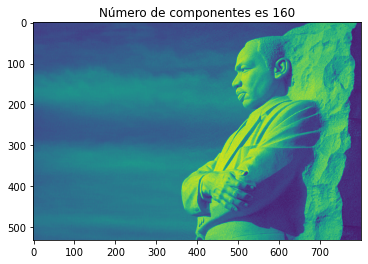

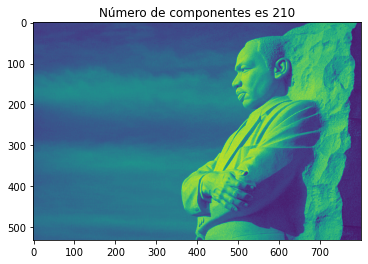

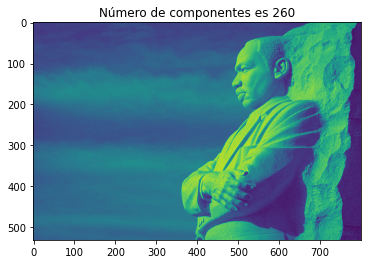

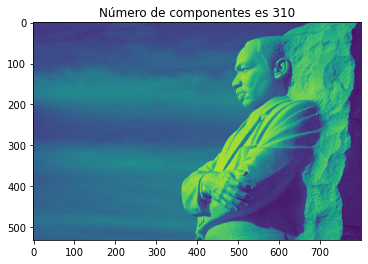

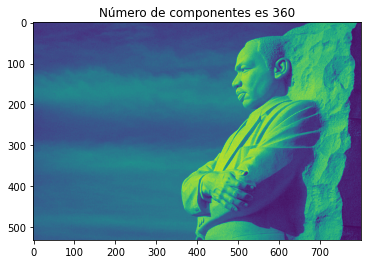

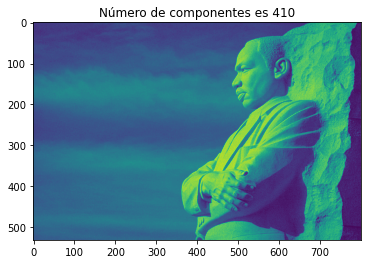

In [48]:
for i in range(10,425,50):
    pca=PCA(n_components=i)
    foto=pca.fit_transform(Martin_G)
    plt.imshow(pca.inverse_transform(foto))
    plt.title(u"Número de componentes es %s" %str(i))
    plt.show()

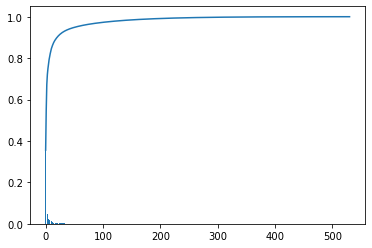

In [49]:
pca=PCA()
pca.fit(Martin_G)
varianza=pca.explained_variance_ratio_
varianza_acumualada=np.cumsum(varianza)
plt.bar(range(len(varianza)),varianza)
plt.plot(range(len(varianza)),varianza_acumualada)
plt.show();